In [7]:
!pip install tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


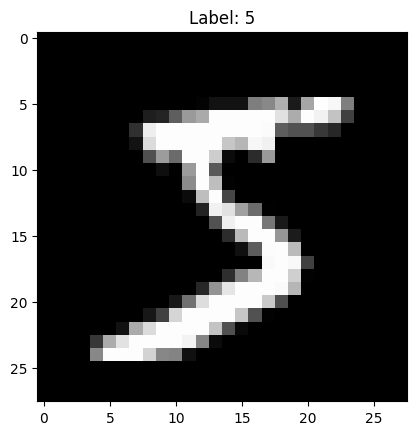

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8761 - loss: 0.4278 - val_accuracy: 0.9586 - val_loss: 0.1313
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9666 - loss: 0.1100 - val_accuracy: 0.9729 - val_loss: 0.0918
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9770 - loss: 0.0731 - val_accuracy: 0.9727 - val_loss: 0.0886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9844 - loss: 0.0490 - val_accuracy: 0.9764 - val_loss: 0.0812
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9878 - loss: 0.0386 - val_accuracy: 0.9708 - val_loss: 0.0975
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1119
Test Loss: 0.0975, Test Accuracy: 97.08%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


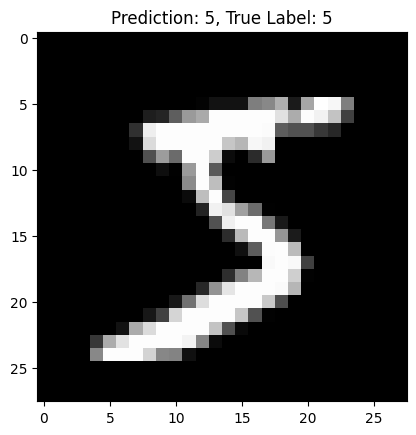

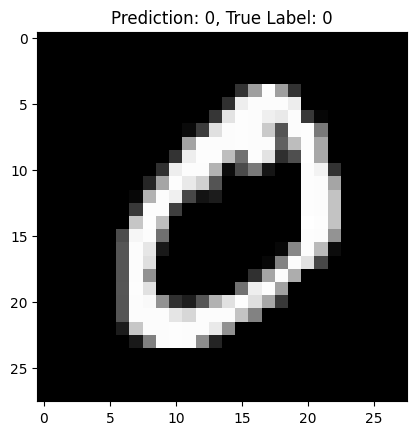

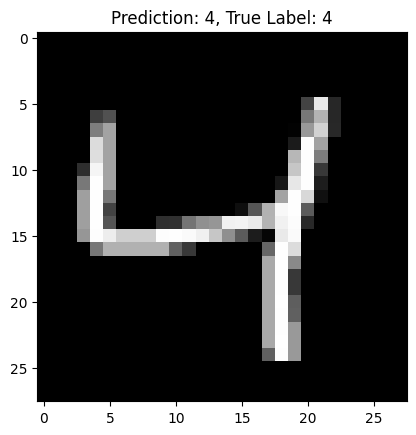

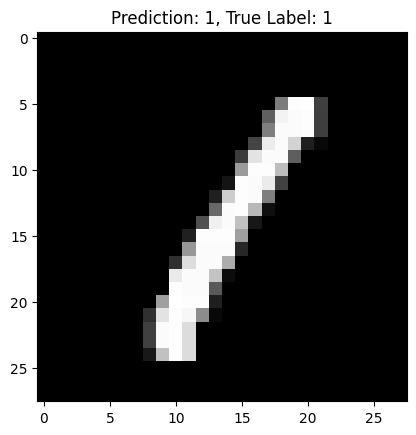

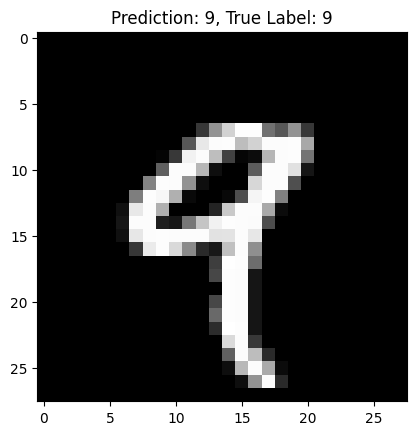

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of incorrect predictions: 292


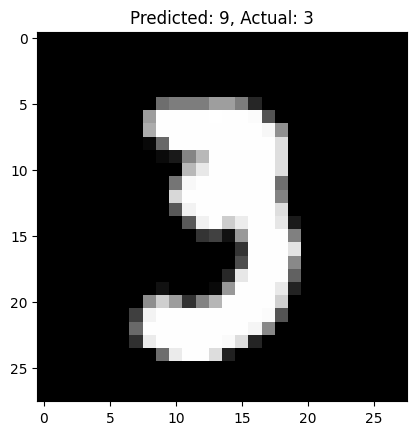

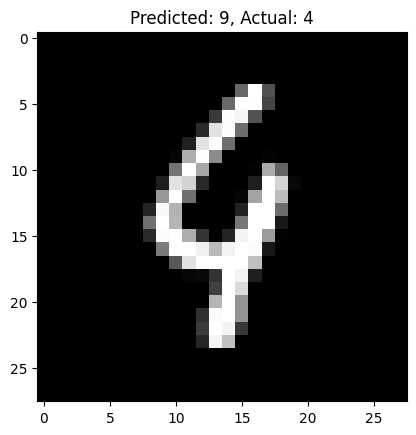

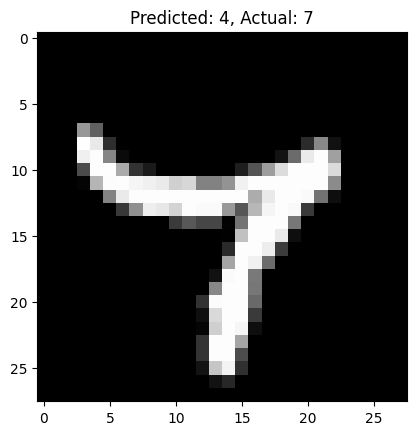

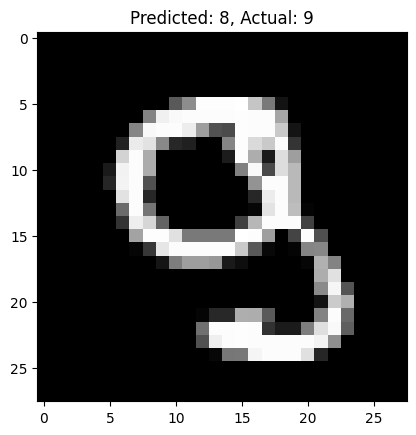

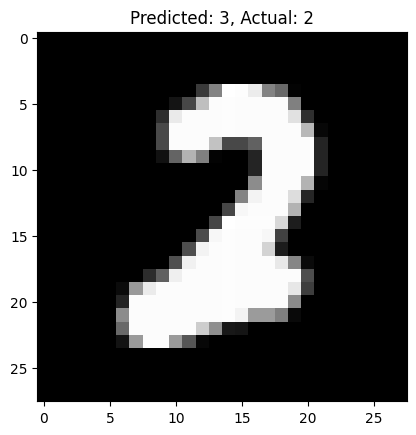

In [2]:
# Load the Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Look at an image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Build the model
model = tf.keras.Sequential()

# Flatten input
model.add(layers.Flatten(input_shape=(28, 28)))

# Add hidden layers with specified neurons and activation function
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Output layer for 10 classes
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with specified loss function and optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%")

# View the model in action
number_of_images = 5
probabilities = model.predict(x_train[:number_of_images])
predictions = np.argmax(probabilities, axis=1)

for index in range(number_of_images):
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Prediction: {predictions[index]}, True Label: {y_train[index]}")
    plt.show()

# Look at incorrect predictions
predicted_labels = np.argmax(model.predict(x_test), axis=1)
incorrect_indices = np.where(predicted_labels != y_test)[0]

print(f"Number of incorrect predictions: {len(incorrect_indices)}")

# Display some incorrect predictions
num_incorrect_to_show = 5
for i in range(num_incorrect_to_show):
    index = incorrect_indices[i]
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[index]}, Actual: {y_test[index]}")
    plt.show()
